<a href="https://colab.research.google.com/github/joelsuro100-alt/I2CS_Ex2/blob/main/Gym_Members_data_set_Final_project_ITDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set Gym members
# Data set Gym members
# ***ID 123456789***
---


**Section 1 - Data checking**
---------------------

*call the data base and check if it loaded correctly- top 5 rows*
-

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


*how big is the data? (in columns and rows)*

In [ ]:
df.shape

(973, 15)

*Data info*
---------------------





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

*Data 'info' Analyasis*
---------------------
1. We can infer that there are no null values in the data base- so we wont need to handle that.

2. We can see that there are 2 colommus with string values ~ seen as 'object'   (Gender & Workout_type) that we will need to swich to int so we can work with them

*Data statistic*
---------------------

An interesting discrepancy arises when comparing the data to standard physiological formulas.
The standard formula for Maximum Heart Rate is:

 $HR_{max} = 220 - Age$.

While the average age in our dataset is 39 (implying a theoretical max HR of ~182), we observe significant deviations when inserting in the formula.

In [ ]:
df['Theoretical_Max_HR'] = 220 - df['Age']

anomalies = df[df['Max_BPM'] > df['Theoretical_Max_HR']] #check how many people are above the theoretical Max heart rate
print(f"number of people that exceeded over the maximum theoretical HR: {len(anomalies)}")
anomalies[['Age', 'Max_BPM', 'Theoretical_Max_HR']].std()

number of people that exceeded over the maximum theoretical HR: 434


,0
Age,8.712693
Max_BPM,9.132532
Theoretical_Max_HR,8.712693


In [ ]:
anomalies[['Age', 'Max_BPM', 'Theoretical_Max_HR']]

,Age,Max_BPM,Theoretical_Max_HR
0,56,180,164
1,46,179,174
4,38,188,182
5,56,168,164
7,40,189,180
...,...,...,...
962,57,172,163
963,57,180,163
964,56,190,164
970,59,194,161


In [ ]:
anomalies = anomalies.copy()

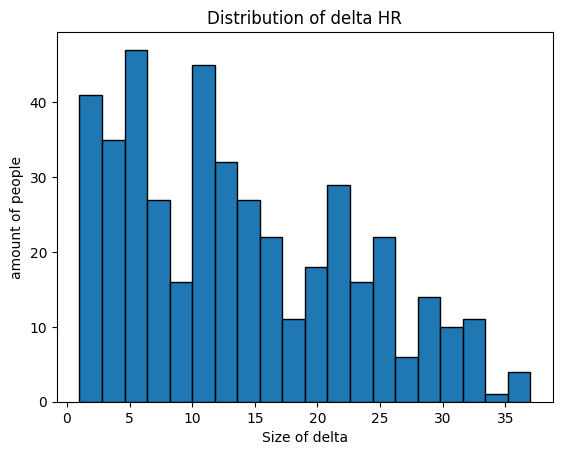

In [ ]:
import matplotlib.pyplot as plt
anomalies['deltaHR']=anomalies['Max_BPM']-anomalies['Theoretical_Max_HR']
anomalies['deltaHR'].hist(bins=20,edgecolor="black")
plt.xlabel('Size of delta')
plt.ylabel('amount of people')
plt.title('Distribution of delta HR')
plt.grid(False)
plt.show()

For instance, looking at the data, we see older individuals reaching BPM levels significantly higher than their theoretical limit (e.g., a 56-year-old with 180 BPM vs. a theoretical limit of 164).
This suggests that either the gym members are highly athletic (outliers), or there might be some measurement errors in the tracking devices.

We can see that most people that exceeded the theoretical maximum heart rate only by a small margin (e.g., 5–15 BPM). This implies that for the majority, the deviation is within a reasonable range for high-intensity training, while extreme deviations (above 30 BPM) are rarer

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


*Data statistic*:
---------------------

After reviewing the statistical summary (describe), we can confirm the data is logical with no negative numbers.

The average BPM is within normal human standards. The average gym member in our dataset is 39 years old, weighs 74 kg, and burns approximately 905 calories in a 1.5-hour workout.

 We also observed a high Standard Deviation for 'Calories_Burned', indicating significant variance in workout intensity among members.

*Insight/observation-Physiological Logic vs. Data*

**Section 2 - Data cleanning**
---------------------

we know that we dont have empty cells from the 'info'(in section 1) so were going to handle the gender column to replace the string -> int by giving the Male=0 & female=1.

In [ ]:
df ['genderInt'] = df['Gender'].map({'Male': 0, 'Female': 1})
df[['Gender','genderInt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     973 non-null    object
 1   genderInt  973 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ KB


We want to do the same thing to 'workout_type' by replacing:
cardio=1,
HIIT=2,
strength=3,
yoga=4,

In [ ]:
df ['WO_typeInt'] = df ['Workout_Type'].map({'Cardio': 1,'HIIT': 2,'Strength': 3,'Yoga': 4})
df[['Workout_Type','WO_typeInt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Workout_Type  973 non-null    object
 1   WO_typeInt    973 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ KB


final colloms:

In [ ]:
columns_to_show = ['Gender', 'genderInt', 'Workout_Type', 'WO_typeInt',]
df[columns_to_show].head()

,Gender,genderInt,Workout_Type,WO_typeInt
0,Male,0,Yoga,4
1,Female,1,HIIT,2
2,Female,1,Cardio,1
3,Male,0,Strength,3
4,Male,0,Strength,3


**Section 3 - Data visualization**
---------------------

After cleaning and preparing the data, we will explore distributions of important metrics like calories burned, compare workout types, and look for relationships between different variables and visualize them.

*heatmap chart*
---------------------

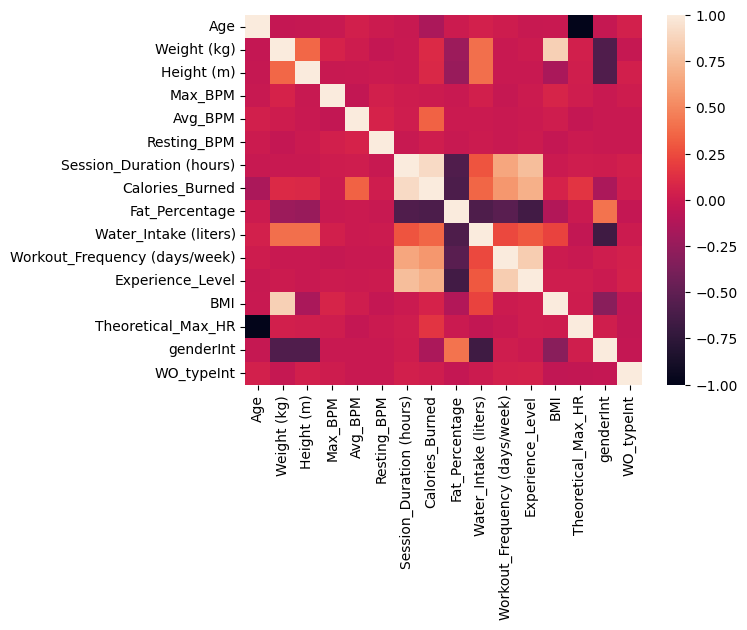

In [ ]:
sns.heatmap(df.corr(numeric_only=True))
plt.show()

From the heatmap we can observe a near-perfect correlation between Session_Duration and Calories_Burned. This is logically sound, as workout duration is the primary factor driving total energy expenditure.

In addition as expected, Weight and BMI show a high correlation. Since BMI is mathematically derived from weight, this serves as a verification that the data values are consistent.

*Distribution of burned calories among all members histogram*
---------------------

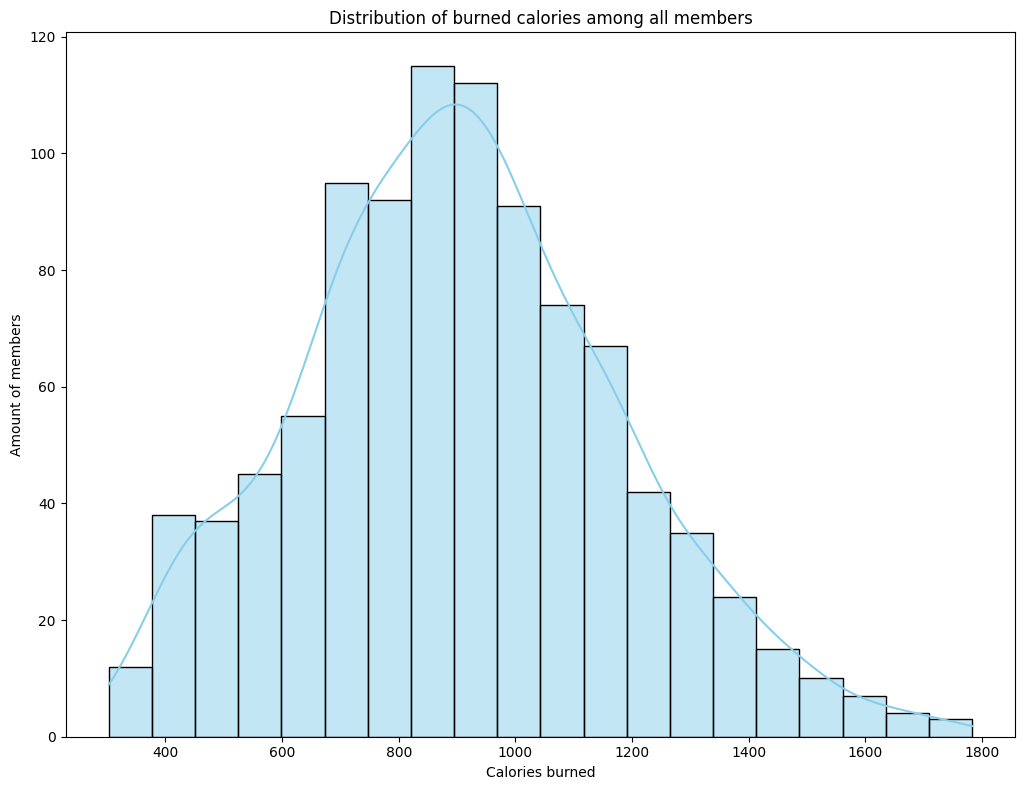

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8)) #size of chart
plt.subplot(1, 2, 1) #1 row, 2 columns, first plot
sns.histplot(df['Calories_Burned'], bins=20, kde=True, color='skyblue')#create histogram-'bins' sets bar count, 'kde' adds the distrebution line with collor
plt.title('Distribution of burned calories among all members') #distribution of burned calories among all members
plt.xlabel('Calories burned') #calories burned
plt.ylabel('Amount of members') #amount of members

plt.tight_layout() #adjust layout to prevent overlapping titles/labels
plt.show() #display the combined figure

Observing the histogram, we can identify a distinct pattern in the members workout intensity. The overlaid KDE (distrebution shape) line reveals a clear Normal Distribution (Bell Curve) structure.

The peak of this curve aligns perfectly with the average, indicating that the central tendency of the dataset is around 900 calories per session.

This suggests that while there is variance, the majority of gym members perform workouts of similar intensity, with fewer individuals at the extreme low or high ends of caloric burn

*Average calories burned for each workout type chart*
---------------------

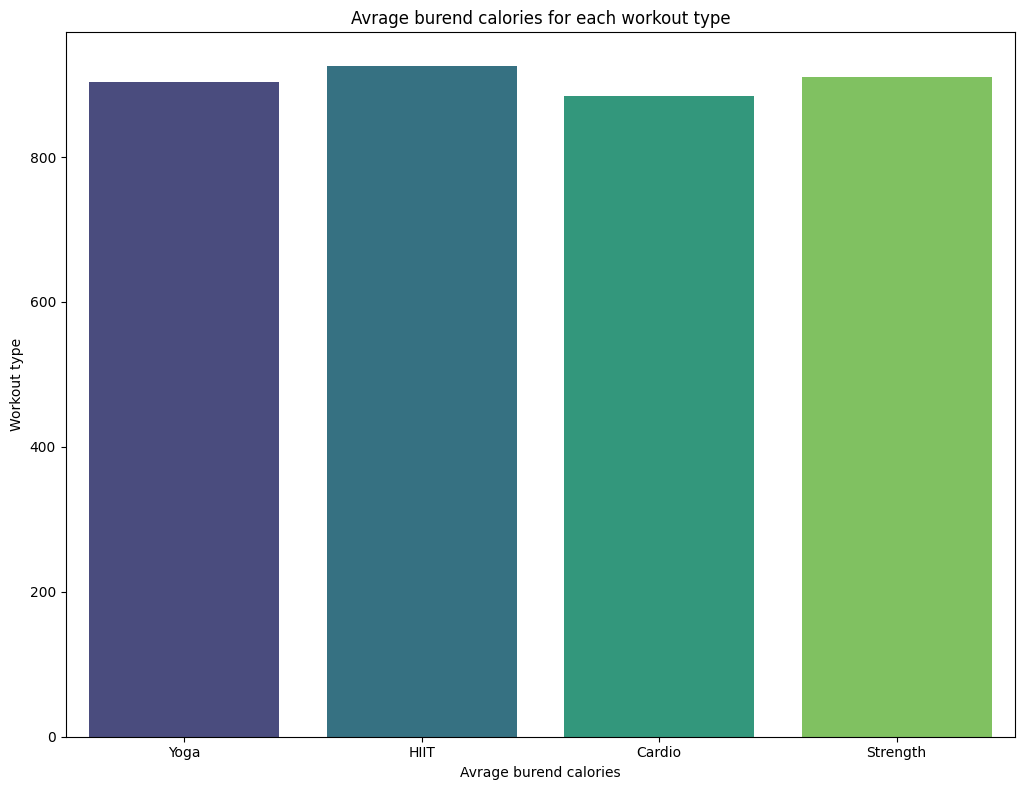

In [ ]:
plt.figure(figsize=(20, 8))#size of chart
plt.subplot(1, 2, 2) #1 row, 2 columns, second plot
sns.barplot(x='Workout_Type', y='Calories_Burned', data=df, errorbar=None, hue='Workout_Type', palette='viridis', legend=False)#plot average values per category- 'errorbar=None' removes the black vertical lines (confidence intervals)
plt.title('Avrage burend calories for each workout type')
plt.xlabel('Avrage burend calories')
plt.ylabel('Workout type')

plt.tight_layout() #adjust layout to prevent overlapping titles/labels
plt.show()

This chart displays the average number of calories burned for each workout type. It is clearly visible that HIIT leads to a higher average calorie burn compared to other workout types.

However, when examining the other workout types – Strength, Cardio, and Yoga – we observe that the differences in the average calories burned among them are relatively small.
This insight suggests that while there is one standout workout in terms of calorie expenditure, for the others, similar levels of calorie burn can generally be expected.

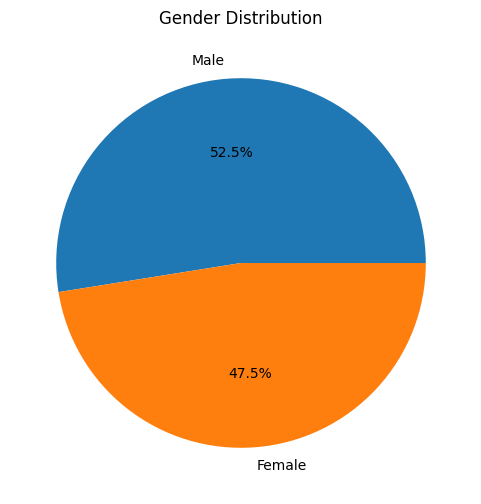

In [ ]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

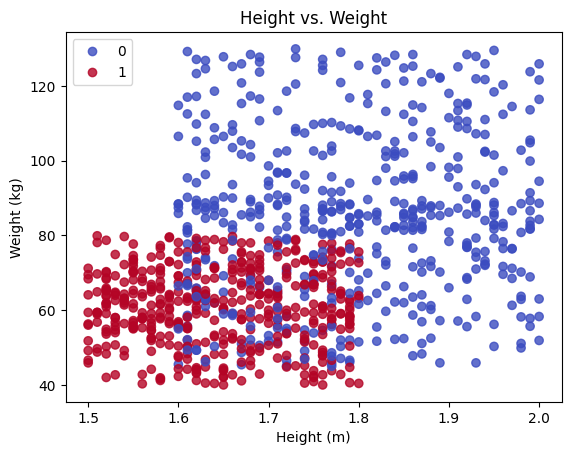

In [ ]:
sc=plt.scatter(x=df['Height (m)'], y=df['Weight (kg)'],c=df['genderInt'],cmap='coolwarm',alpha=0.8)
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.title('Height vs. Weight')
plt.legend(*sc.legend_elements())
plt.show()

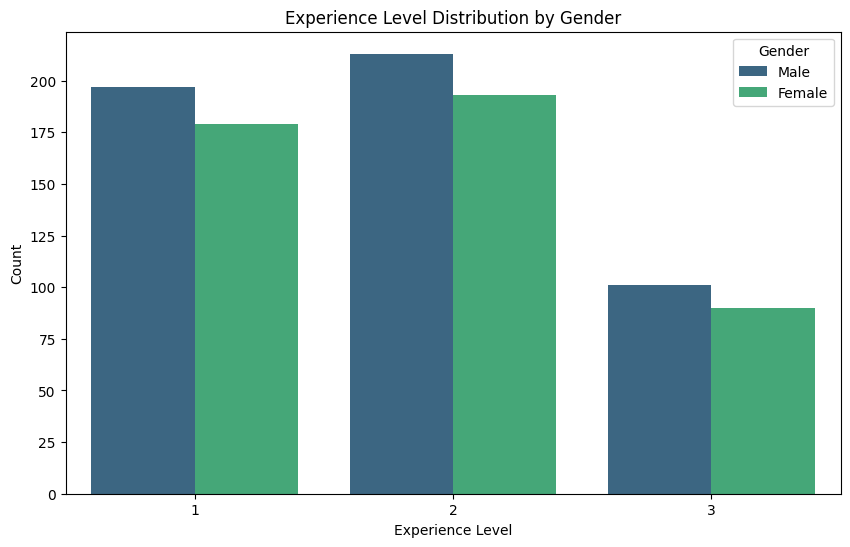

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Experience_Level', hue='Gender', palette='viridis')

plt.title('Experience Level Distribution by Gender')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# GENDER PREDICTION

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target_col = 'genderInt'
#list of features I'm using
features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
            'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
            'Water_Intake (liters)', 'BMI', 'WO_typeInt']

X = df[features]
y = df[target_col]

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 778, Test size: 195


### standard scaler

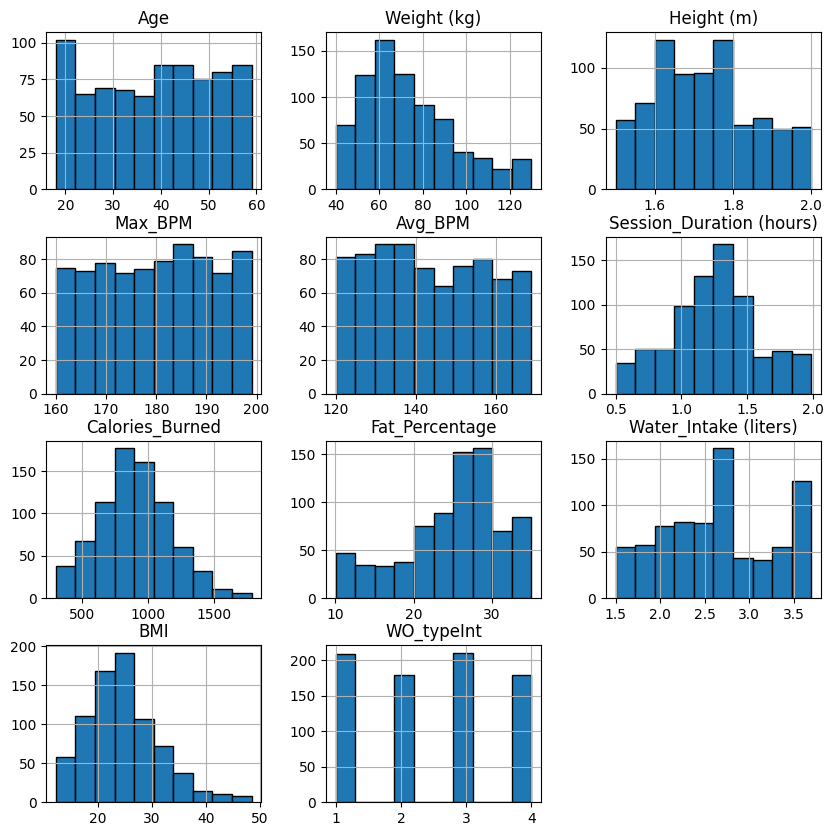

In [ ]:
X_train.hist(figsize=(10,10),edgecolor="black")
plt.title("before standard scaler")
plt.show()

In [ ]:
def standard_scaler(train_df, test_df):

    #capture the statistics from the TRAINING set
    train_mean = train_df.mean()
    train_std = train_df.std()

    #(x - train_mean) / train_std
    train_scaled = (train_df - train_mean) / train_std
    test_scaled = (test_df - train_mean) / train_std

    return train_scaled, test_scaled

X_train, X_test = standard_scaler(X_train, X_test)

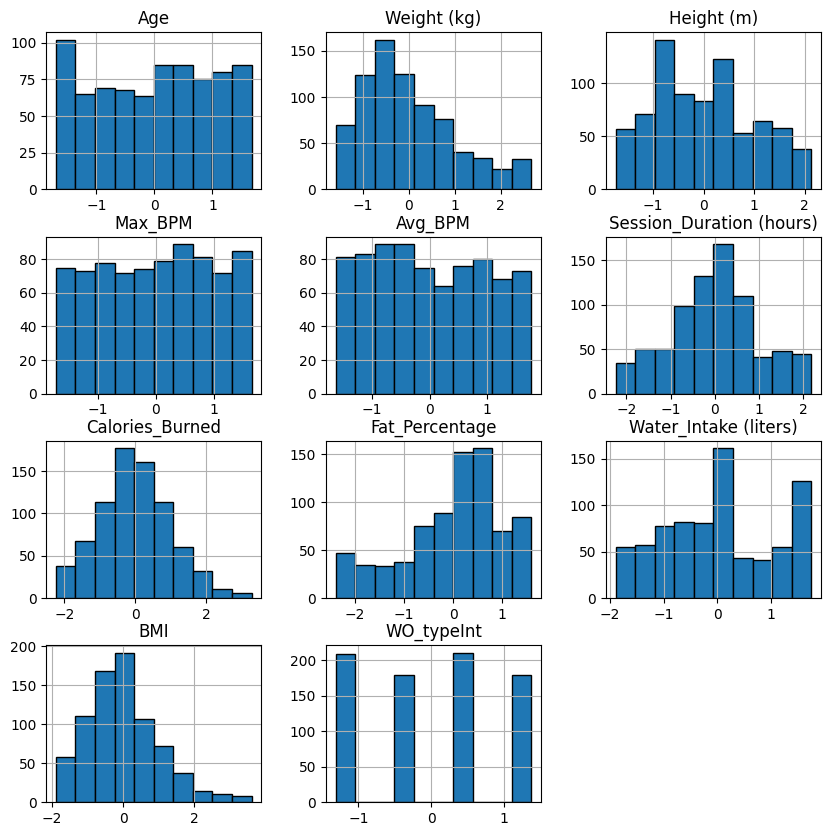

In [ ]:
X_train.hist(figsize=(10,10),edgecolor="black")
plt.title("standard scaler")
plt.show()

# KNN

In [ ]:
def predict_knn(X_train, y_train, X_test, k=5):
    """
    My implementation of KNN from scratch.
    using the Math formula: sqrt(sum((x - y)^2))
    k=5 for small odd number(algorithem is on 2 classes M/F)
    """
    predictions = []

    #convert to numpy arrays for speed
    train_data = X_train.values
    test_data = X_test.values
    train_labels = y_train.values

    #loop over every person in the test set we want to predict
    for i in range(len(test_data)):
        test_point = test_data[i]

        distances = np.sqrt(np.sum((train_data - test_point)**2, axis=1))

        #find the nearest neighbors
        nearest_neighbor_indices = np.argsort(distances)[:k]
        nearest_labels = train_labels[nearest_neighbor_indices]

        #cheak results
        most_common = np.bincount(nearest_labels).argmax()
        predictions.append(most_common)

    return np.array(predictions)

# NAIVE BAYES

In [ ]:
def calc_likelihood(mean, var, x):
    """
    Helper function- calculate the probability using the
    Probability Density Function (bell curve)
    """
    #small number to prevent division by zero
    eps = 1e-4
    coeff = 1 / np.sqrt(2 * np.pi * var + eps)
    exponent = np.exp(-((x - mean) ** 2) / (2 * var + eps))
    return coeff * exponent

def train_nb(X, y):
    """
    Training function: receives data and returns the dictionary of parameters (means and variances)
    """
    classes = np.unique(y)
    params = {}

    for c in classes:
        #take only men or only women
        X_c = X[y == c]

        #calculate and save the parameters
        params[c] = {
            'mean': X_c.mean(axis=0),
            'var': X_c.var(axis=0),
            'prior': len(X_c) / len(X)
        }

    return classes, params

def predict_nb(X, classes, params):
    """
    Prediction function: receives the new data and the parameters from training,
    and returns a prediction
    """
    y_pred = []
    #convert to Numpy array
    X_arr = X.values

    for x in X_arr:
        posteriors = []

        for c in classes:
            prior = np.log(params[c]['prior'])

            #extract the data saved in the training phase
            mean = params[c]['mean'].values
            var = params[c]['var'].values

            #calculate the likelihood for all features and sum their logs
            likelihood = np.sum(np.log(calc_likelihood(mean, var, x)))

            #Bayes formula- Prior + Likelihood
            posteriors.append(prior + likelihood)

        #check what higher
        y_pred.append(classes[np.argmax(posteriors)])

    return np.array(y_pred)

In [ ]:
def calc_metrics(y_true, y_pred, model_name, dataset_type="Test"):
    """
    Function that calculates all the required metrics manually (without sklearn)
    """
    # convert to arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # calculate TP, TN, FP, FN
    TP = np.sum((y_pred == 1) & (y_true == 1))
    TN = np.sum((y_pred == 0) & (y_true == 0))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))

    # calculate the metrics according to the formulas
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f_measure = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"--- {model_name} [{dataset_type} Set] ---")
    print(f"Accuracy:  {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall:    {recall:.2%}")
    print(f"F-Measure: {f_measure:.2%}")
    print("")

In [ ]:
print("=== FINAL REPORT ===\n")

# KNN Analysis
knn_pred_train = predict_knn(X_train, y_train, X_train, k=5)
knn_pred_test = predict_knn(X_train, y_train, X_test, k=5)

calc_metrics(y_train, knn_pred_train, "KNN", "Train")
calc_metrics(y_test, knn_pred_test, "KNN", "Test")

print("-" * 30 + "\n")
# NAIVE BAYES Analysis
classes_trained, parameters_trained = train_nb(X_train, y_train)

nb_pred_train = predict_nb(X_train, classes_trained, parameters_trained)
nb_pred_test = predict_nb(X_test, classes_trained, parameters_trained)

calc_metrics(y_train, nb_pred_train, "Naïve Bayes", "Train")
calc_metrics(y_test, nb_pred_test, "Naïve Bayes", "Test")

=== FINAL REPORT ===

--- KNN [Train Set] ---
Accuracy:  95.24%
Precision: 92.69%
Recall:    97.53%
F-Measure: 95.05%

--- KNN [Test Set] ---
Accuracy:  94.36%
Precision: 91.43%
Recall:    97.96%
F-Measure: 94.58%

------------------------------

--- Naïve Bayes [Train Set] ---
Accuracy:  89.59%
Precision: 85.11%
Recall:    94.23%
F-Measure: 89.44%

--- Naïve Bayes [Test Set] ---
Accuracy:  90.26%
Precision: 86.92%
Recall:    94.90%
F-Measure: 90.73%

